In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

from model import *
from utils import *
from generate import *

# setup stylenet
params = StylenetArgs()
params.gpu = '0'
params.backend = 'cudnn'
params.model_file = '/home/bzion/.ml4a/models/neural_style/vgg19-d01eb7cb.pth'  #'../models/vgg19-d01eb7cb.pth'

dtype, multidevice, backward_device = setup_gpu(params)
stylenet = StyleNet(params, dtype, multidevice, backward_device, verbose=False)


Model setup successfully with parameters:
gpu: 0, optimizer: lbfgs, learning_rate: 1.00, lbfgs_num_correction: 100, pooling: max, model_file: /home/bzion/.ml4a/models/neural_style/vgg19-d01eb7cb.pth, False, backend: cudnn, False, content_layers: relu4_2, style_layers: relu1_1,relu2_1,relu3_1,relu4_1,relu5_1, hist_layers: relu2_1,relu3_1,relu4_1,relu5_1, multidevice_strategy: 4,7,29


In [2]:
# %load_ext autoreload
# %autoreload 2

# #from neuralarttools import *
# from neuralarttools.image import *
# import neuralarttools.external.basnet as basnet
# print(basnet)

## Simple example

Note: reconsider how `input_image` works.

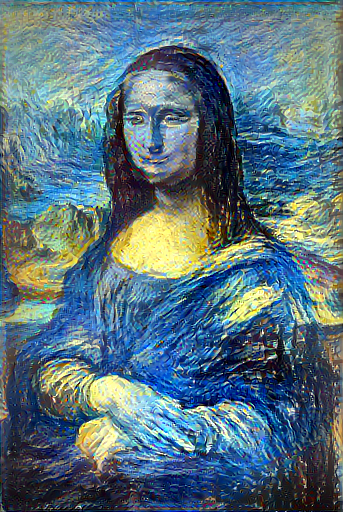

In [4]:
config = {
    'content_image': '../images/inputs/monalisa.jpg',
    'style_image': '../images/inputs/starry_night.jpg'
}

img = style_transfer(stylenet, config)
display(img)

## More customized

Additional parameters to customize: 
* `size`: size of canvas (default 512). Either as tuple `(h, w)` or maximum dimension.
* `style_scale`: At what scale resolution to extract style features fr om style images (deault 1.0)
* `input_image`: Start canvas from another image, rather than from random.
* `num_iterations`: How many steps for the optimization (default 1000)
* `original_colors`: Once done, transfer color distribution to that of the content image.

Note that all images, `content_image`, `style_images`, and `input_image` can all be either actual images or paths to saved images on disk.

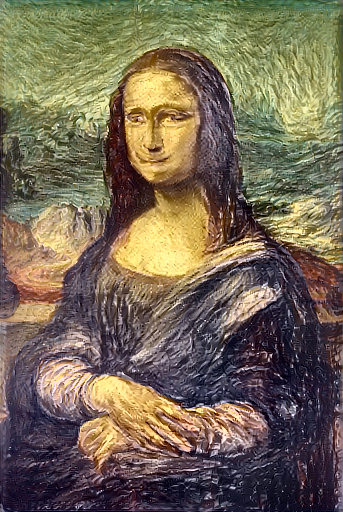

In [5]:

config = {
    'size': 512, #(1024, 768), 
    'content_image': '../images/inputs/monalisa.jpg',
    'style_images': '../images/inputs/starry_night.jpg',
    'style_scale': 1.0,
    'num_iterations': 1000,
    'original_colors': True
}

img = style_transfer(stylenet, config)
display(img)

## Multi-resolution

Additional parameters to customize: 
* `num_octaves`: size of canvas (default 512). Either as tuple `(w, h)` or maximum dimension.
* `octave_scale`: At what scale resolution to extract style features fr om style images (deault 1.0)
* `num_iterations` and `style_scale` can be set as 1 element, i.e. same for each resolution, or as lists


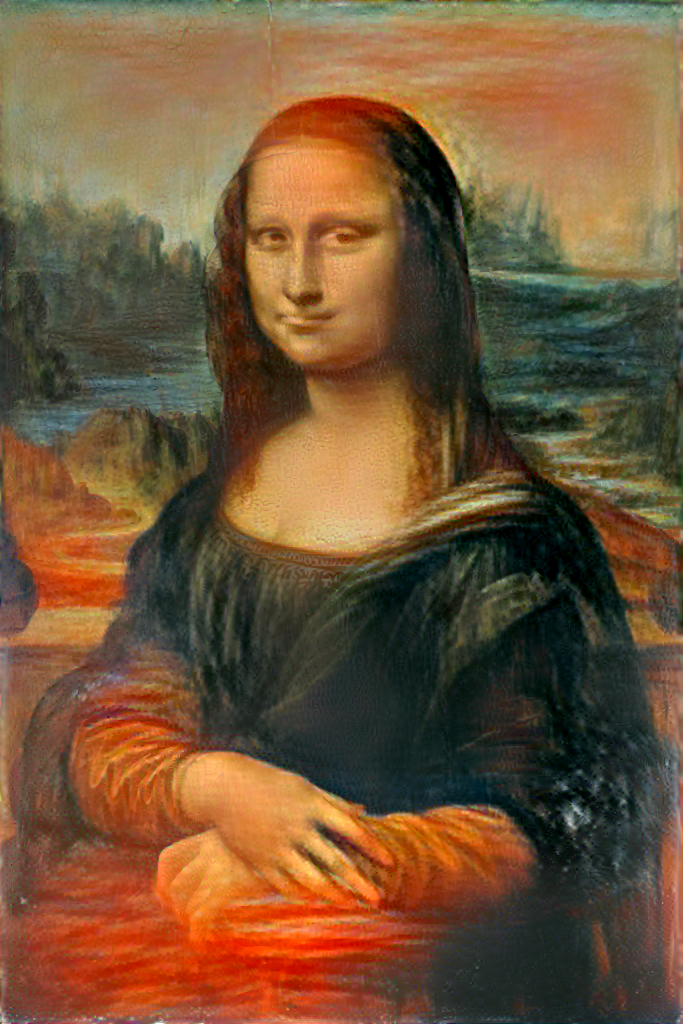

In [6]:

config = {
    'size': (683, 1024),
    'content_image': '../images/inputs/monalisa.jpg',
    'style_images': '../images/inputs/the_scream.jpg',
    'num_iterations': [1000, 750, 500],
    'num_octaves': 3,
    'octave_ratio': 2.0
}

img = style_transfer(stylenet, config)
display(img)

The output of an image can be saved.

In [7]:
save(img, 'my_example2.png')

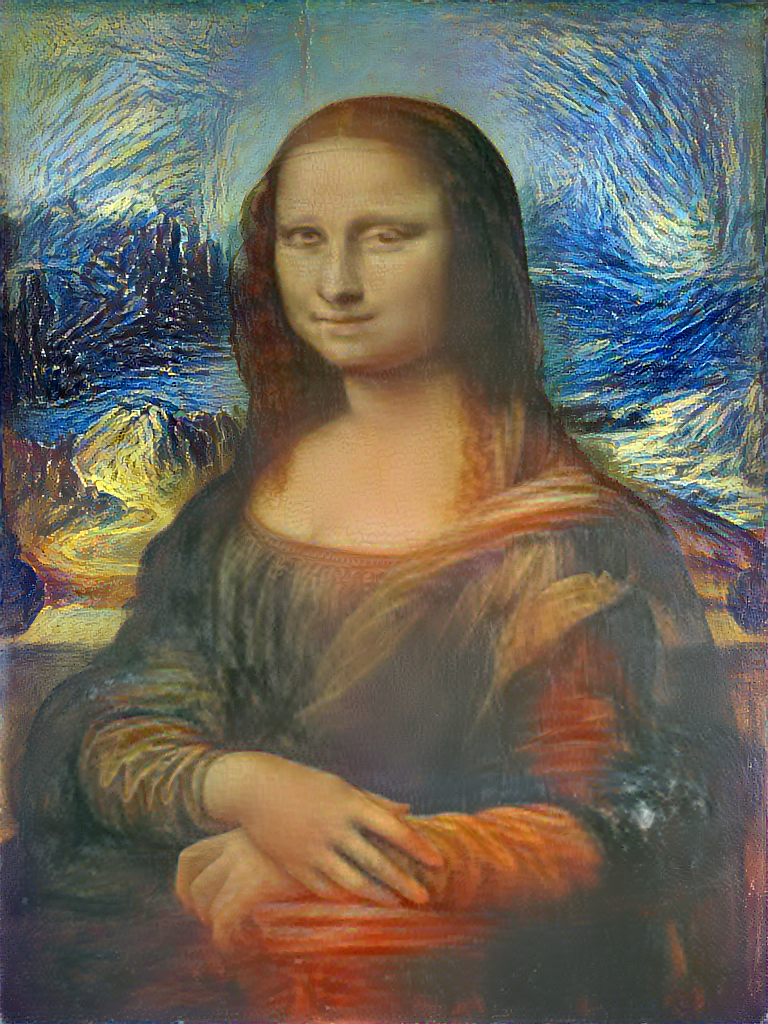

In [9]:

config = {
    'size': (768, 1024), 
    'content_image': '../images/inputs/monalisa.jpg',
    'style_images': ['../images/inputs/the_scream.jpg',
                     '../images/inputs/starry_night.jpg'],
    'content_masks': ['../images/masks/monalisa1b.png',
                      '../images/masks/monalisa1a.png'],
    'style_scale': 1.0,
    'num_iterations': [800, 500, 250],
    'num_octaves': 3,
    'octave_ratio': 1.8,
    'original_colors': False
}


img = style_transfer(stylenet, config)
display(img)

save(img, 'myimg2.png')


In [ ]:

config = {
    'size': (683, 1024),
    'content_image': '../images/inputs/monalisa.jpg',
    'style_images': 'https://www.artyfactory.com/art_appreciation/art_movements/art-movements/cubism/picasso_cubism.jpg',
    'num_iterations': [1000, 750, 500],
    'num_octaves': 3,
    'octave_ratio': 2.0
}

img = style_transfer(stylenet, config)
display(img)